# Data

41156
3798
44954
   UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative  


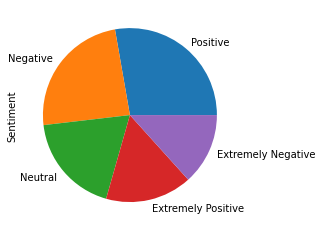

In [45]:
import os
import pandas as pd
import matplotlib.pyplot as plt

trainset = pd.read_csv('./archive/Corona_NLP_train.csv')
testset = pd.read_csv('./archive/Corona_NLP_test.csv')
df = trainset.append(testset, ignore_index=True)
print(len(trainset))
print(len(testset))
print(len(df))
print(trainset.head())
trainset['Sentiment'].value_counts().plot.pie()
#reduce classes
trainset['Sentiment'].replace(['Extremely Negative', 'Extremely Positive'], ['Negative', 'Positive'], inplace=True) #differentiate between positive and negative tweet to reduce scale
testset['Sentiment'].replace(['Extremely Negative', 'Extremely Positive'], ['Negative', 'Positive'], inplace=True)

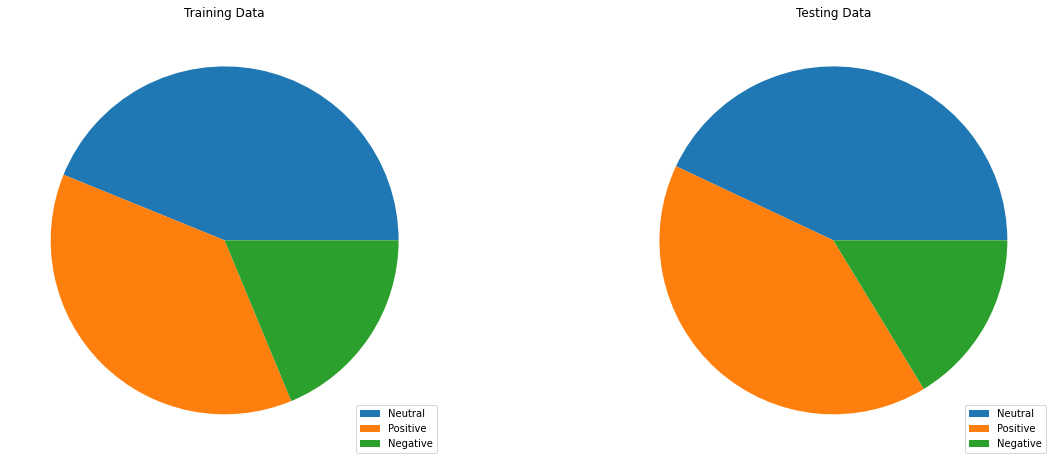

In [46]:
fig, axes = plt.subplots(1,2,figsize=(20,8))
labels = trainset['Sentiment'].unique()
axes[0].pie(trainset['Sentiment'].value_counts())
axes[0].legend(labels)
axes[0].set_title('Training Data')

axes[1].pie(testset['Sentiment'].value_counts())
axes[1].legend(labels)
axes[1].set_title('Testing Data')


plt.show()


### Number of word per tweet

Neutral tweets seem to have less word count than positive or negative tweets

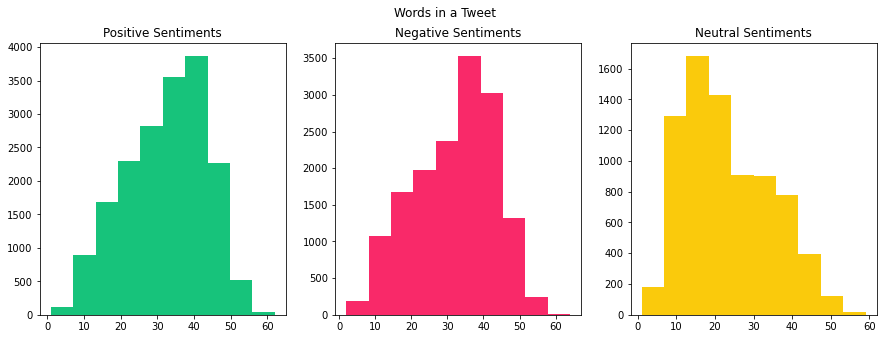

In [168]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))
tweet_len=trainset[trainset['Sentiment']=="Positive"]['OriginalTweet'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='#17C37B')
ax1.set_title('Positive Sentiments')


tweet_len=trainset[trainset['Sentiment']=="Negative"]['OriginalTweet'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='#F92969')
ax2.set_title('Negative Sentiments')

tweet_len=trainset[trainset['Sentiment']=="Neutral"]['OriginalTweet'].str.split().map(lambda x: len(x))
ax3.hist(tweet_len,color='#FACA0C')
ax3.set_title('Neutral Sentiments')

fig.suptitle('Words in a Tweet')
plt.show()

## Hashtags

Text(0.5, 1.0, 'Most Common Hashtags')

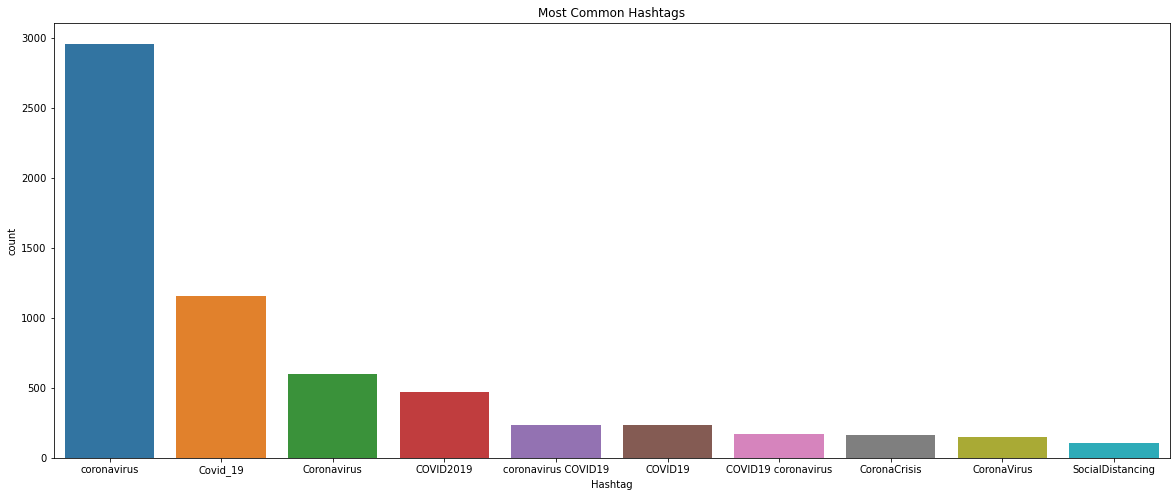

In [167]:
import re
import seaborn as sns

fig, axes = plt.subplots(1,1,figsize=(20,8))


def find_hash(text):
    line=re.findall(r'(?<=#)\w+',text)
    return " ".join(line)
    
df['hash']=df['OriginalTweet'].apply(lambda x:find_hash(x))
temp=df['hash'].value_counts()[:][1:11]
temp= temp.to_frame().reset_index().rename(columns={'index':'Hashtag','hash':'count'})
sns.barplot(x="Hashtag",y="count", data = temp)
axes.set_title("Most Common Hashtags")

## Mentions

Text(0.5, 1.0, 'Most Common Mentions')

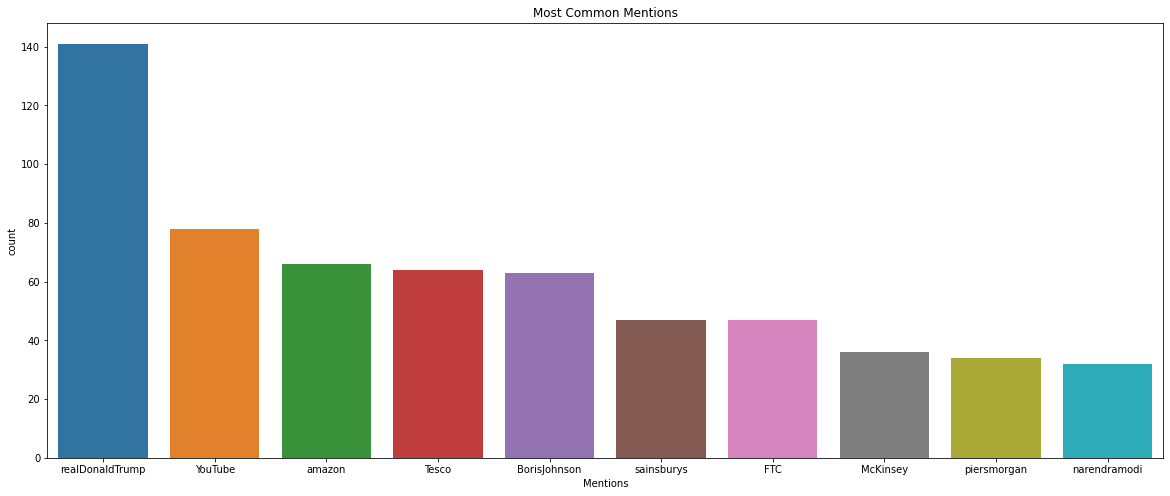

In [166]:
def mentions(text):
    line=re.findall(r'(?<=@)\w+',text)
    return " ".join(line)

fig, axes = plt.subplots(1,1,figsize=(20,8))

df['mentions']=df['OriginalTweet'].apply(lambda x:mentions(x))

temp=df['mentions'].value_counts()[:][1:11]
temp =temp.to_frame().reset_index().rename(columns={'index':'Mentions','mentions':'count'})

sns.barplot(x="Mentions",y="count", data = temp)
axes.set_title("Most Common Mentions")

## Pre-Processing the NLP data

### Removing Stop Words

In [163]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer

#import numpy as np
stopwords = stopwords.words('english')
lancaster= LancasterStemmer()


tokens_without_sw = [word for word in trainset['OriginalTweet'] if word not in stopwords]
tokens_without_sw = [lancaster.stem(word) for word in tokens_without_sw]

test_without_sw = [word for word in testset['OriginalTweet'] if word not in stopwords]
test_without_sw = [lancaster.stem(word) for word in test_without_sw]

trainset['text'] = tokens_without_sw
testset['text'] = test_without_sw

print(trainset['OriginalTweet'][40])
print('------------')
print(tokens_without_sw[40])


We're here to provide a safe shopping experience for our customers and a healthy environment for our associates and community!

Online orders can be placed here: https://t.co/dCSXHUj3U0



#jlmco #jlmcobrand #coronapocolypse #coronavirus #CoronavirusOutbreak  #COVID19 #shoponline https://t.co/riNKwskeRS
------------
we're here to provide a safe shopping experience for our customers and a healthy environment for our associates and community!

online orders can be placed here: https://t.co/dcsxhuj3u0



#jlmco #jlmcobrand #coronapocolypse #coronavirus #coronavirusoutbreak  #covid19 #shoponline https://t.co/rinkwskers


### Removing urls, HTML links in tweets, and punctuation

In [51]:
#Remove Urls and HTML links
def remove_urls(text):
    url_remove = re.compile(r'https?://\S+|www\.\S+')
    return url_remove.sub(r'', text)

trainset['text']=trainset['text'].apply(lambda x:remove_urls(x))
testset['text']=testset['text'].apply(lambda x:remove_urls(x))


def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
    
trainset['text']=trainset['text'].apply(lambda x:remove_html(x))
testset['text']=testset['text'].apply(lambda x:remove_html(x))

def punct_remove(text):
    punct = re.sub(r"[^\w\s\d]","", text)
    return punct

trainset['text']=trainset['text'].apply(lambda x:punct_remove(x))
testset['text']=testset['text'].apply(lambda x:punct_remove(x))

### Remove mentions, hashtags, extra whitespace


In [52]:
def remove_mention(x):
    text=re.sub(r'@\w+','',x)
    return text

trainset['text']=trainset['text'].apply(lambda x:remove_mention(x))
testset['text']=testset['text'].apply(lambda x:remove_mention(x))


def remove_hash(x):
    text=re.sub(r'#\w+','',x)
    return text

trainset['text']=trainset['text'].apply(lambda x:remove_hash(x))
testset['text']=testset['text'].apply(lambda x:remove_hash(x))

def remove_space(text):
    space_remove = re.sub(r"\s+"," ",text).strip()
    return space_remove

trainset['text']=trainset['text'].apply(lambda x:remove_space(x))
testset['text']=testset['text'].apply(lambda x:remove_space(x))

In [161]:
print(trainset['text'][40])
print('----------------------------------------')
print(trainset['OriginalTweet'][40])

were here to provide a safe shopping experience for our customers and a healthy environment for our associates and community online orders can be placed here jlmco jlmcobrand coronapocolypse coronavirus coronavirusoutbreak covid19 shoponline
----------------------------------------
We're here to provide a safe shopping experience for our customers and a healthy environment for our associates and community!

Online orders can be placed here: https://t.co/dCSXHUj3U0



#jlmco #jlmcobrand #coronapocolypse #coronavirus #CoronavirusOutbreak  #COVID19 #shoponline https://t.co/riNKwskeRS


## NLP Models and model preparation

#### Preprocessing and vecotrizing data

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from numpy import array

X_train = trainset["text"].tolist()
y_train = array(trainset["Sentiment"])
X_test = testset["text"].tolist()
y_test = array(testset["Sentiment"])
trainset_len = len(X_train)
full_X = X_train + X_test

y_transition = {'Neutral':0, 'Positive':1, 'Negative':2}
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)


#Transform each text into a vector using TF IDF vectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, stop_words='english')

full_X = tfidf.fit_transform(full_X).toarray()
X_train = full_X[0:trainset_len,:]
X_test = full_X[trainset_len:,:]



print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(41156, 11361)
(41156,)
(3798, 11361)
(3798,)


In [84]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

# random forest
# Linear support vector classification
# Naive Bayes
# xgboost


models = [
    XGBClassifier(n_estimators=100, max_depth=5, random_state=0, use_label_encoder=False, tree_method = "hist"),
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),   
]

# k-fold cross validation for k=5 groups
k_cv = 5
cv_df = pd.DataFrame(index=range(k_cv * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X_train, y_train, scoring='accuracy', cv= k_cv)
  print('Done')
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    

[10:28:08] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:32:01] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:35:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror'

In [152]:
import plotly.figure_factory as ff
import plotly.io as pio

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc = acc.rename_axis("model_name").reset_index()
acc = ff.create_table(acc)
acc
#pio.write_image(acc,'twitter_nlp_results/accuarcy_table.png')

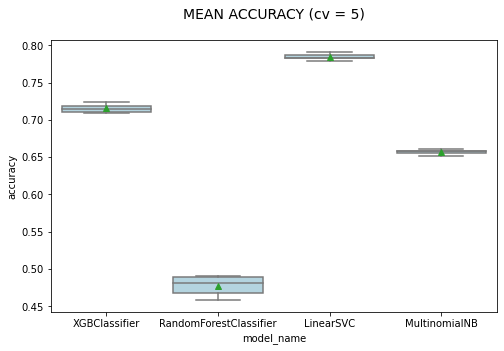

In [119]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14)
plt.savefig('twitter_nlp_results/accuarcy_plot.png')

# Linear Support Vector Classification

Since the Linear SVC was the best predictor will will fit it as our model.

In [156]:
model_choice = LinearSVC()
model_choice.fit(X_train, y_train)
y_pred = model_choice.predict(X_test)

In [157]:
from sklearn import metrics
y_transition = {'Neutral':0, 'Positive':1, 'Negative':2}

print('\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred, target_names= ['Neutral', 'Positive', 'Negative']))
c_report = metrics.classification_report(y_test, y_pred, target_names= ['Neutral', 'Positive', 'Negative'], output_dict = True)
df_report = pd.DataFrame(c_report).T
df_report = df_report.rename_axis("Sentiment").reset_index()

plotly_report = ff.create_table(df_report)

pio.write_image(plotly_report,'twitter_nlp_results/classification_metrics_svm.png')

			CLASSIFICATIION METRICS

              precision    recall  f1-score   support

     Neutral       0.81      0.80      0.81      1633
    Positive       0.68      0.64      0.66       619
    Negative       0.81      0.84      0.83      1546

    accuracy                           0.79      3798
   macro avg       0.77      0.76      0.77      3798
weighted avg       0.79      0.79      0.79      3798



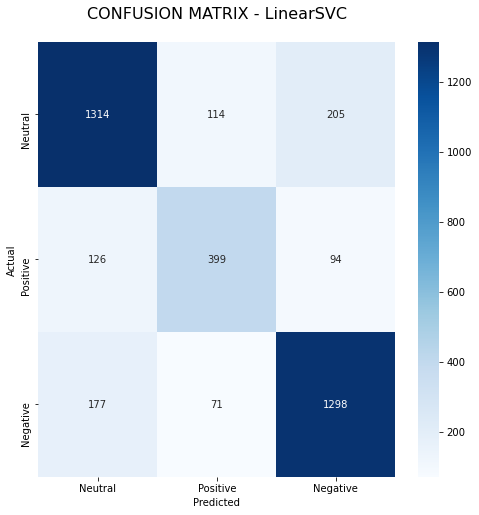

In [159]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=['Neutral', 'Positive', 'Negative'], 
            yticklabels=['Neutral', 'Positive', 'Negative'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=16)
plt.savefig('twitter_nlp_results/confusion_matrix_svm.png')